<a href="https://colab.research.google.com/github/changsin/DeepLearning-101/blob/master/02-tf-xor-revisited-deep-learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The code is a slight variation of the article [How to solve XOR problem in Keras](https://medium.com/analytics-vidhya/understanding-basics-of-deep-learning-by-solving-xor-problem-cb3ff6a18a06).

In [28]:
import numpy as np

from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import plot_model
from matplotlib import pyplot

In [16]:
model = Sequential()
model.add(Dense(units=2,activation='relu', input_dim=2))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())
print(model.get_weights())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
None
[array([[-0.60407144, -0.6535538 ],
       [ 1.1836365 , -1.0246705 ]], dtype=float32), array([0., 0.], dtype=float32), array([[0.5840899 ],
       [0.60741436]], dtype=float32), array([0.], dtype=float32)]


Dense() means fully connected layers where every node in one lalyers is connected to all the nodes in the next layer. The model has one hidden layer with nine learnable parameters. Other than model.summary(), Keras has a handy utility to visualize the model.


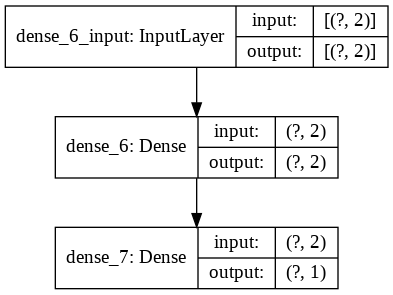

In [22]:
keras.utils.plot_model(model, to_file='xor_model.png', show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

In [9]:
x = np.array([[0.,0.],[0.,1.],[1.,0.],[1.,1.]])
y = np.array([0.,1.,1.,0.])

In [ ]:
history = model.fit(x,y,epochs=1000,batch_size=4)

In [ ]:
model.save('./xor-good-weights.hd5')

In [24]:
print(model.get_weights())
print(model.predict(x,batch_size=4))

[array([[-1.3081621, -0.6535538],
       [ 1.3078191, -1.0246705]], dtype=float32), array([-0.0001756,  0.       ], dtype=float32), array([[1.6605862 ],
       [0.60741436]], dtype=float32), array([-0.4481035], dtype=float32)]
[[0.38981178]
 [0.8485601 ]
 [0.38981178]
 [0.38981178]]


  [array([[-1.3081621, -0.6535538],
       [ 1.3078191, -1.0246705]], dtype=float32), array([-0.0001756,  0.       ], dtype=float32), array([[1.6605862 ],
       [0.60741436]], dtype=float32), array([-0.4481035], dtype=float32)]

[[0.38981178]
 [0.8485601 ]
 [0.38981178]
 [0.38981178]]

1/1 [==============================] - 0s 1ms/step - loss: 0.4892 - accuracy: 0.7500


[array([[ 0.24800655,  1.10779   ],
       [-1.0030258 ,  1.107669  ]], dtype=float32), array([-0.26201358, -1.1084698 ], dtype=float32), array([[-0.26150066],
       [-3.3309755 ]], dtype=float32), array([0.62593275], dtype=float32)]
[[0.6515666 ]
 [0.6515666 ]
 [0.6515666 ]
 [0.04472694]]

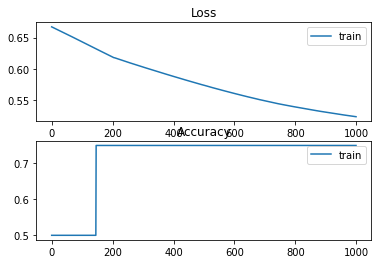

In [29]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.legend()

# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.legend()
pyplot.show()